In [28]:
from keras.models import load_model
from matplotlib import pyplot as plt
import os
import skimage.io as io
from inference_stratified import * 

In [48]:
def img_read(test_path,file_list):
    DHM_img = io.imread(os.path.join(test_path,file_list))
    return DHM_img

def plot_comparison(original, filtered, title1,title2):
    font2 = {'family':'serif','color':'black','size':20}
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 20), sharex=True,
                                   sharey=True)
    
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title1,fontdict = font2)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title2,fontdict = font2)
    ax2.axis('off')

In [31]:
cell_model = load_model('DHM_cell_body.hdf5')
neurite_model = load_model('DHM_Neurite.hdf5')

In [42]:
test_path="/Users/behnaz/NCADD/YD/test_img_DHM"
file_list = [f for f in os.listdir(test_path) if f[-3:]=="tif"]

pre2_12DIV_CS1_FOV1_Max.tif


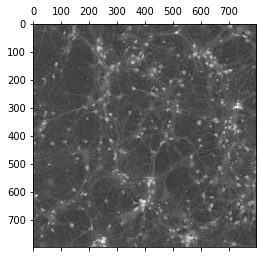

In [43]:
i0=0
id = file_list[i0]
print(file_list[i0])
test_path,file_list[i0]
img_DHM_row = img_read(test_path,id)
plt.matshow(img_DHM_row, cmap='Greys_r')

pre2_12DIV_CS1_FOV1_Max_BC.tif


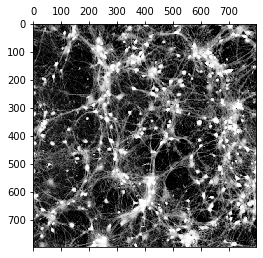

In [45]:
i=1
id = file_list[i]
print(file_list[i])
test_path,file_list[i]
img_DHM_BC = img_read(test_path,id)
plt.matshow(img_DHM_BC, cmap='Greys_r')

In [46]:
Cell_img = inference_fullimage_stratified(
        cell_model, img_DHM_row[...,np.newaxis], szPatch=(128, 128), nbChanOut=1, nbpassstratified=1, prediction_fct=None,
        input_list_instead_chan=False, input_bach_axis=True, input_nbChan=1, output_checkShape=True,
        shufflePatchs=False,
        normInput=True, normPatch=False, normPatchRobust=False, pctNormRobust=0.005, thresh01normRob=True,
        normPatchOutFromIn=False, normPatchOutFromInRobust=False, normOutFromIn=False, normOutFromInRobust=False,
        patchModePreviewInterval=0, showPreview=True, showDuration=True)

1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 50ms/step
Durée de l'inférence : 34.00511908531189 secondes ---


In [47]:
Neurite_img = inference_fullimage_stratified(
        neurite_model, img_DHM_BC[...,np.newaxis], szPatch=(128, 128), nbChanOut=1, nbpassstratified=1, prediction_fct=None,
        input_list_instead_chan=False, input_bach_axis=True, input_nbChan=1, output_checkShape=True,
        shufflePatchs=False,
        normInput=True, normPatch=False, normPatchRobust=False, pctNormRobust=0.005, thresh01normRob=True,
        normPatchOutFromIn=False, normPatchOutFromInRobust=False, normOutFromIn=False, normOutFromInRobust=False,
        patchModePreviewInterval=0, showPreview=True, showDuration=True)

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 45ms/step
Durée de l'inférence : 34.18448209762573 secondes ---


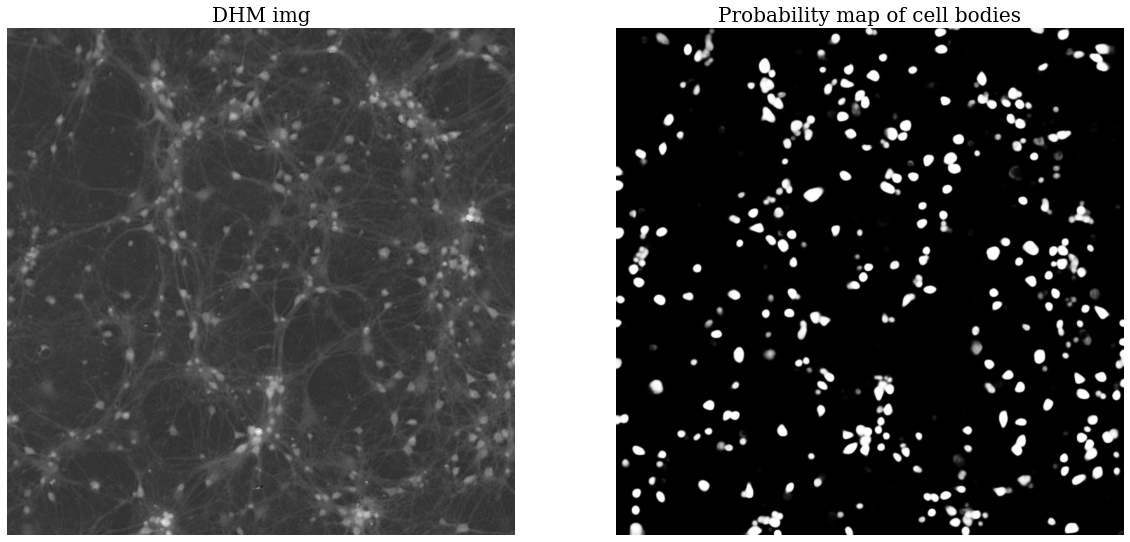

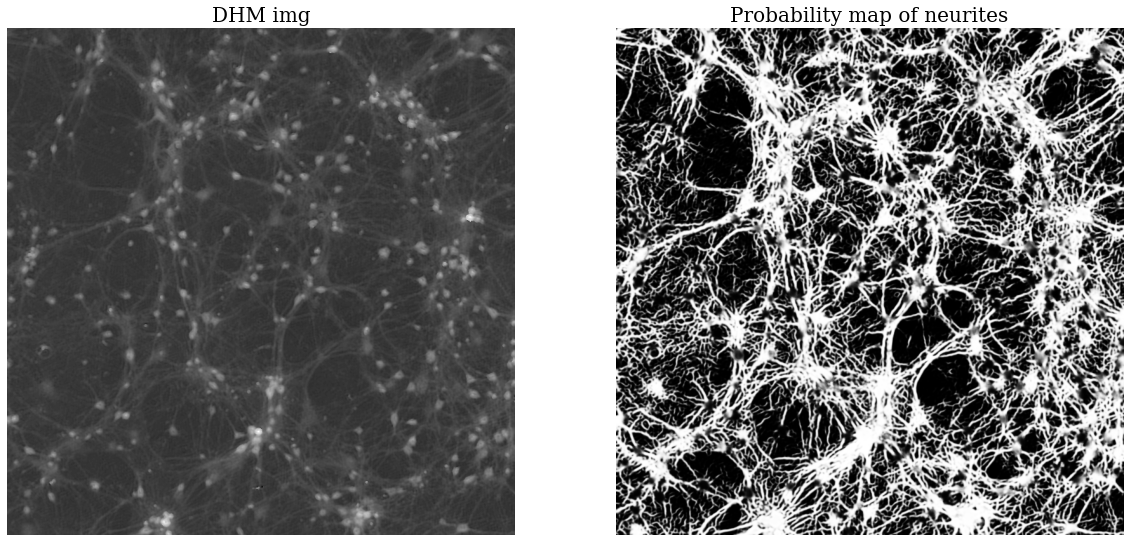

In [49]:
plot_comparison(img_DHM_row, Cell_img , 'DHM img','Probability map of cell bodies')
plot_comparison(img_DHM_row, Neurite_img , 'DHM img','Probability map of neurites')

In [ ]:
# Save the image as TIFF
#cv2.imwrite('Given_name.jpg', Cell_img)